### Forecasting Process
1. Define Goal
2. Get Data
3. Explore and Visualize Series
4. Pre-Process Data
5. Partition Series
6. Apply Forecasting Method(s)
7. Evaluate and Compare perfomance
8. Implement Forecasts/Systems

   ####                                   Amtrak Company
  `Descriptive`
  
  Evaluating teh effect of some events, such as airport closures due to inclement weather, or the opening of a new large national highway. This goal is retrospective in nature,and is therefore descriptive or even explanatory.
  
`Predictive`

Amtrak might have to forecast future monthly ridership on its trains for purposes of pricing. Using demand data to determine pricing is called "revenue management" and is a popular practive by airlines and hotel chains

In [1]:
# laod the dataset

In [2]:
import pandas as pd

In [3]:
dataframe = pd.read_csv("daily-total-female-births-CA.csv")
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
dataframe.date.dtype

dtype('O')

Loading data with parse dates


In [5]:
df = pd.read_csv("daily-total-female-births-CA.csv", header=0, parse_dates=[0])
df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [6]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df.date.dtype

dtype('<M8[ns]')

## Loading data as series

In [11]:
series = pd.read_csv("daily-total-female-births-CA.csv", header=0, parse_dates=[0],index_col=0).stack()
series

date              
1959-01-01  births    35
1959-01-02  births    32
1959-01-03  births    30
1959-01-04  births    31
1959-01-05  births    44
                      ..
1959-12-27  births    37
1959-12-28  births    52
1959-12-29  births    48
1959-12-30  births    55
1959-12-31  births    50
Length: 365, dtype: int64

In [12]:
series.head()

date              
1959-01-01  births    35
1959-01-02  births    32
1959-01-03  births    30
1959-01-04  births    31
1959-01-05  births    44
dtype: int64

Querying by time

In [13]:
print(series['1959-01'])

births    35
births    32
births    30
births    31
births    44
births    29
births    45
births    43
births    38
births    27
births    38
births    33
births    55
births    47
births    45
births    37
births    50
births    43
births    41
births    52
births    34
births    53
births    39
births    32
births    37
births    43
births    39
births    35
births    44
births    38
births    24
dtype: int64


In [14]:
series.shape

(365,)

In [15]:
df.shape

(365, 2)

In [16]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
dtype: float64

### Feature Engineering
1. What is feature engineeering
2. The rationale and goals fo feature engineering on time series data
3. How to develop basic date-time based input features.
4. How to develop more sophisticated lag and sliding window summary statistic features

A time series dataset must be transformed to be modeled as a supervised learning  problem.
Input variables are also called features in the field of machine learning, and the task befoe us is to create or invent new input features from our time series dataset.

#### Type of Features
1. Date time Features = These are components of the time step itself for each observation.
2. Lag Features = these are values at prior time steps
3. Window Features =These are a summar of values over a fixed window of prior time stpes
    * Rolling Window: Add a summary of the values at previous time Steps
    * Expanding Window: Anothe type of window that may be useful included all previous data in teh series

### Date time features

In [17]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [18]:
features = df.copy()

In [19]:
features['year'] = df.date.dt.year

In [20]:
features

,date,births,year
0,1959-01-01,35,1959
1,1959-01-02,32,1959
2,1959-01-03,30,1959
3,1959-01-04,31,1959
4,1959-01-05,44,1959
...,...,...,...
360,1959-12-27,37,1959
361,1959-12-28,52,1959
362,1959-12-29,48,1959
363,1959-12-30,55,1959


In [22]:
features['month'] = df.date.dt.month

In [23]:
features['day'] = df.date.dt.day

In [24]:
features.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [25]:
features.tail()

,date,births,year,month,day
360,1959-12-27,37,1959,12,27
361,1959-12-28,52,1959,12,28
362,1959-12-29,48,1959,12,29
363,1959-12-30,55,1959,12,30
364,1959-12-31,50,1959,12,31


### Lag Features

In [27]:
features['lag1'] = df.births.shift(1)

In [28]:
features['lag2'] = df.births.shift(365)

In [29]:
features.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [30]:
features.tail()

,date,births,year,month,day,lag1,lag2
360,1959-12-27,37,1959,12,27,34.0,NaN
361,1959-12-28,52,1959,12,28,37.0,NaN
362,1959-12-29,48,1959,12,29,52.0,NaN
363,1959-12-30,55,1959,12,30,48.0,NaN
364,1959-12-31,50,1959,12,31,55.0,NaN


### Windows features

In [31]:
features['Roll_mean'] = df.births.rolling(window=2).mean()

In [32]:
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5


In [35]:
features['Roll_max'] = df.births.rolling(window =3).max() # get the max out of the last three values
features.head()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


### Expanding Features

In [38]:
# when we are using expanding we are literally taking the highest value from the past,
# and we only update it with the next hightest values

In [36]:
features['Expand_max'] = df.births.expanding().max()
features.head()


,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


In [37]:
features.tail()

,date,births,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
360,1959-12-27,37,1959,12,27,34.0,NaN,35.5,44.0,73.0
361,1959-12-28,52,1959,12,28,37.0,NaN,44.5,52.0,73.0
362,1959-12-29,48,1959,12,29,52.0,NaN,50.0,52.0,73.0
363,1959-12-30,55,1959,12,30,48.0,NaN,51.5,55.0,73.0
364,1959-12-31,50,1959,12,31,55.0,NaN,52.5,55.0,73.0


### Time-Series -- Resampling
Resampling = changing frequency of available data to match the frequency of required forecast
* Types
1. UPsampling --> e.g increase the frequency of the data e.g from months to years
2. Downsampling - where you decrease the frequency of the samples, such as from days to months

### Down Sampling and Upsampling

In [42]:
miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header=0, parse_dates=[0])


In [49]:
miles_df['year'] = miles_df['Month'].dt.year

In [50]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [51]:
miles_df.groupby('year')['MilesMM'].mean() # average miles per year

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

In [52]:
miles_df.groupby('year')['MilesMM'].max() # maximum miles recorded per year

year
1963    10748
1964    11030
1965    11424
1966    12417
1967    13281
1968    13812
1969    15110
1970    16234
Name: MilesMM, dtype: int64

In [55]:
miles_df.groupby('year')['MilesMM'].sum() # sum of total miles by year

year
1963     99603
1964    106192
1965    115431
1966    119154
1967    126515
1968    128975
1969    143664
1970    157497
Name: MilesMM, dtype: int64

### Downsampling

In [44]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [45]:
quarterly_miles_df.head() # data comes in quarter a year

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [46]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [47]:
yearly_total_miles_df.head() # data comes in yearly data/annual

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


### Upsampling

In [56]:
upsampled_miles_df = miles_df.resample("D", on='Month').mean()


In [58]:
del upsampled_miles_df['year']

In [59]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [60]:
interpolated_miles_df = upsampled_miles_df.interpolate(methods='linear')
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


In [61]:
interpolated_miles_df.tail()

,MilesMM
Month,
1970-11-27,12615.066667
1970-11-28,12654.300000
1970-11-29,12693.533333
1970-11-30,12732.766667
1970-12-01,12772.000000


# plotting the graph

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

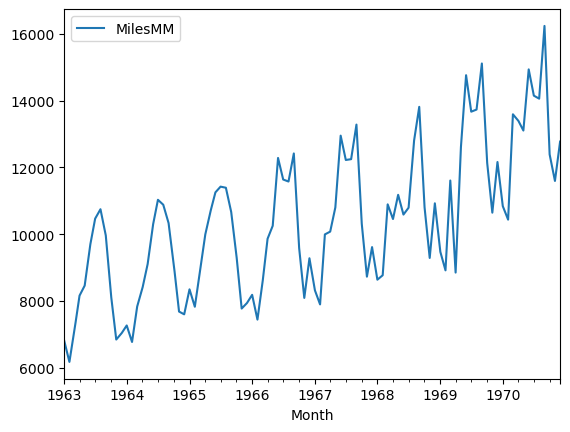

In [65]:
interpolated_miles_df.plot()
plt.show()

In [67]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

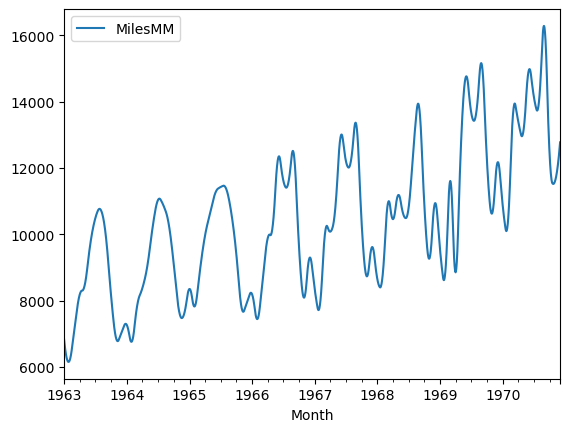

In [68]:
poly_interpolated_miles_df.plot()
plt.show()